# **Loan default prediction**

# **1. Problem Statement**

Loan default prediction is critical for financial institutions to minimize losses and optimize lending processes.

 This project leverages historical loan data to build a neural network that predicts default risk, enabling banks to:

- Reduce financial losses by identifying high-risk applicants

- Optimize approval processes through automated risk assessment

- Maintain regulatory compliance with data-driven decisions

- Improve customer satisfaction through fair lending practices

# **Dataset Link**

Dataset:https://www.kaggle.com/datasets/nikhil1e9/loan-default

# **2.Exploration of the Data**

In this part i will import the required  Libraries and then do the basic exploration parts such as ,finding the shape, droping the missing values,class distribution. Then i will visualise the result using disribution Plots, box plot etc.


I will also use **pair plot** to find out the key features.

**2.1) Import Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    f1_score, classification_report, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score
)
from sklearn.utils.class_weight import compute_class_weight

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [ ]:
warnings.filterwarnings('ignore', message='Do not pass an `input_shape`/`input_dim` argument to a layer.')




**2.2) Loading the  Data**

In [ ]:
df = pd.read_csv('/content/Loan_default.csv')

**2.3) Print shape before dropping missing targets**

In [ ]:

print("Before dropna:", df.shape)


Before dropna: (255347, 18)


**2.4) Drop rows where the target ('Default') is missing and reset the index**

In [ ]:
df = df.dropna(subset=['Default'], ignore_index=True)

**2.5) Print shape after dropping missing targets**

In [ ]:
print("After dropna:", df.shape)

After dropna: (255347, 18)


**2.6) Print column names**

In [ ]:
print(df.columns)

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


**2.7) Shape**

In [ ]:
print(f"Shape: {df.shape}")

Shape: (255347, 18)


**2.8) Missing Values**

In [ ]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


**2.9) Class Distribution**

In [ ]:
target_col = 'Default'
print(f"Class distribution:\n{df[target_col].value_counts(normalize=True)}")




Class distribution:
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


The result shows that around 12% of the applicants has default on their loans.
This  shows that there is class imbalance. .

**2.10) Visualizations**

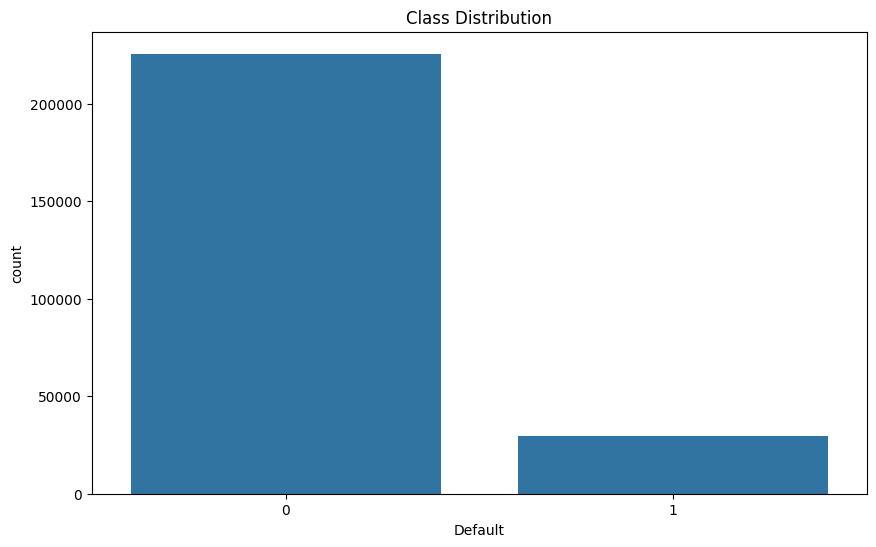

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=target_col, data=df)
plt.title('Class Distribution')
plt.show()


The above bar-plot shows that the majority of the applicant did not default.Therefore we need to select metric way beyond accuracy.

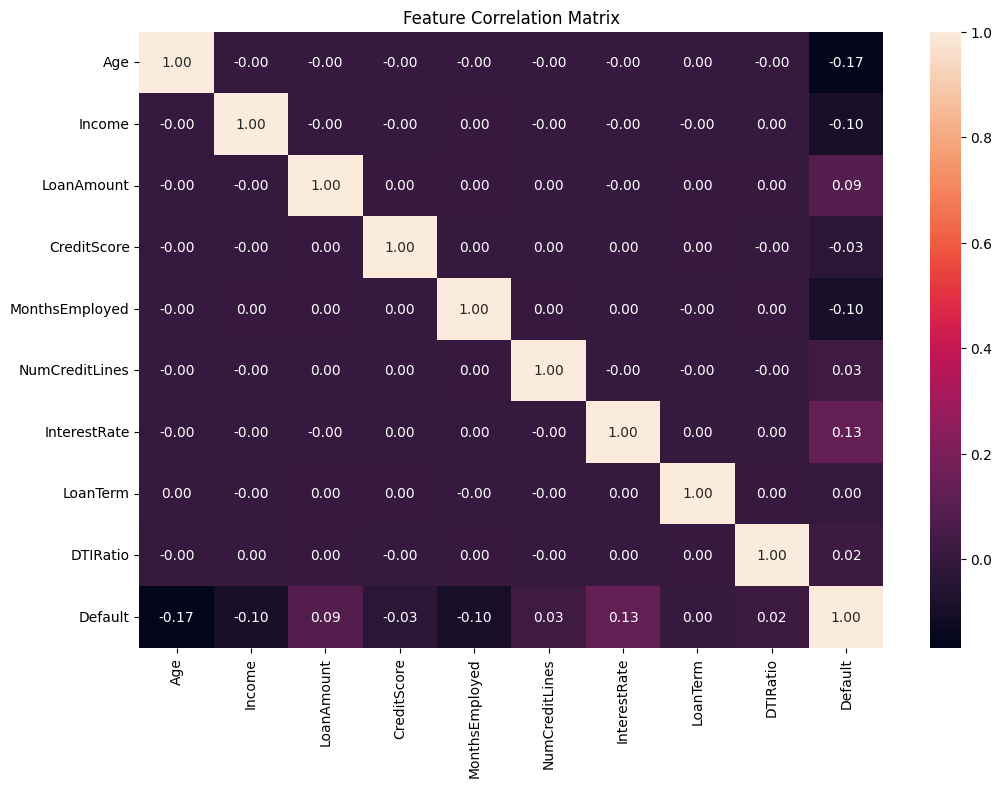

In [ ]:

plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

The correlation matrix graph shows that the creditscore and income are negatively correlated with thec default. That means higher the incomes or scores lower the default risk.

Also the loan Amount and interestRate show moderate positive correlation with the Default.

**2.11) Distribution Plots:**

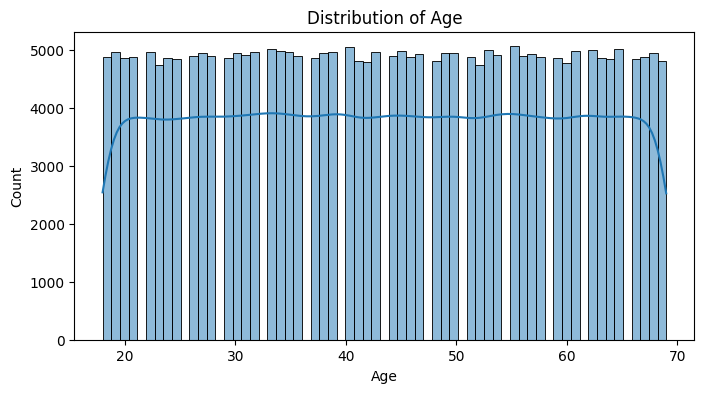

Result: Here the graph shows us that the applicants are in the age of 25 to 45 years old. very few are too young or too old


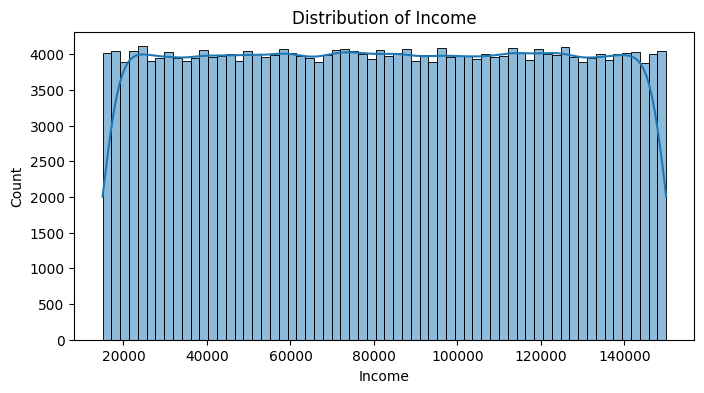

Result: Most of the applicants are earning less than the mean value and  very small number of them are of  high-income.


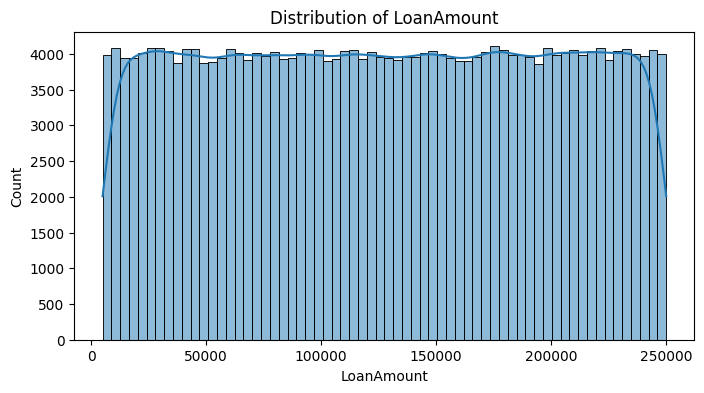

Result: The most loans taken are for  small amounts,while some applicants have taken large loans.


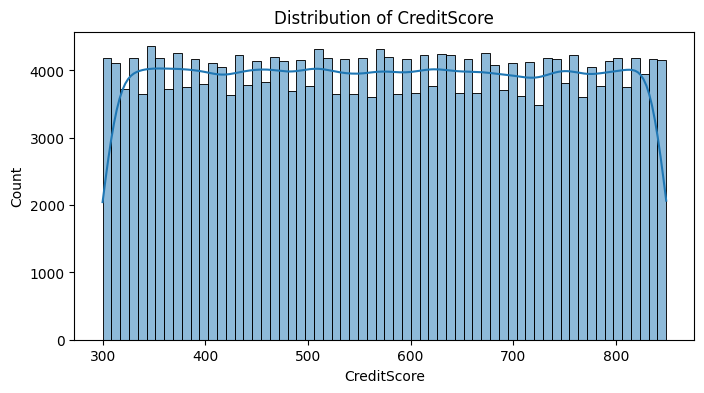

Result: The CreditScore of the applicants is focused around larger values, 
 but there is a small portion of applicants with  very low scores but they may be at a 
 higher risk of the  default.


In [ ]:
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    if col == 'Age':
        print("Result: Here the graph shows us that the applicants are in the age of 25 to 45 years old. very few are too young or too old")
    elif col == 'Income':
        print("Result: Most of the applicants are earning less than the mean value and  very small number of them are of  high-income.")
    elif col == 'LoanAmount':
        print("Result: The most loans taken are for  small amounts,while some applicants have taken large loans.")
    elif col == 'CreditScore':
        print("Result: The CreditScore of the applicants is focused around larger values, \n but there is a small portion of applicants with  very low scores but they may be at a \n higher risk of the  default.")


**2.12) Boxplots:**

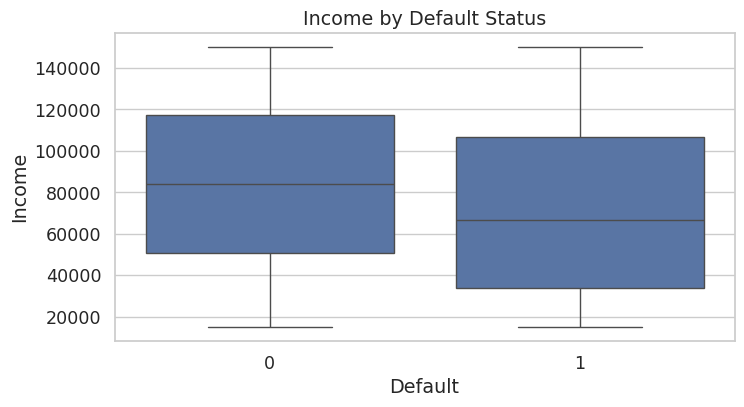

Result: according to the boxplot the defaulters normally have lower income than the non-defaulter.


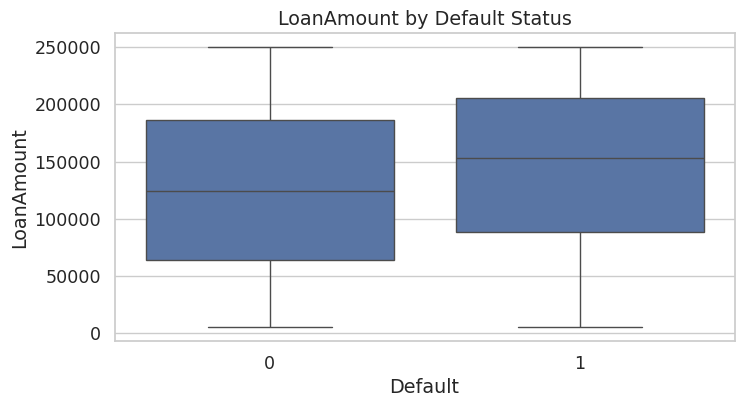

Result: The loan distribution is almost similar for both the groups, but the defaulters has some of the highest loan amounts.


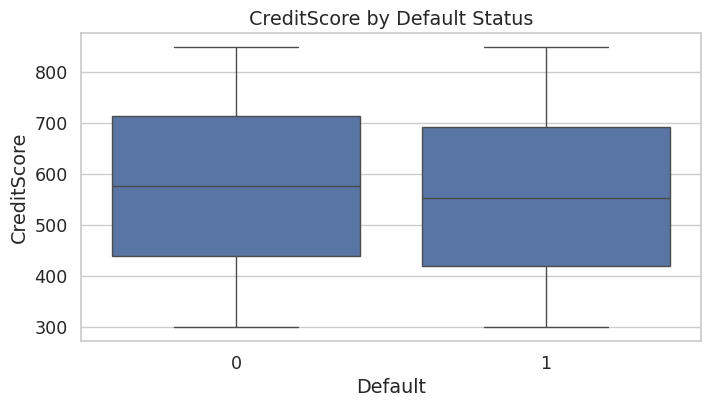

Result: the defaulters have  low credit score, this confirms the creditScore as major risk predictor.


In [ ]:
for col in ['Income', 'LoanAmount', 'CreditScore']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Default', y=col, data=df)
    plt.title(f'{col} by Default Status')
    plt.show()
    if col == 'Income':
        print("Result: according to the boxplot the defaulters normally have lower income than the non-defaulter.")
    elif col == 'LoanAmount':
        print("Result: The loan distribution is almost similar for both the groups, but the defaulters has some of the highest loan amounts.")
    elif col == 'CreditScore':
        print("Result: the defaulters have  low credit score, this confirms the creditScore as major risk predictor.")


**2.13) Pairplot for Key Features:**

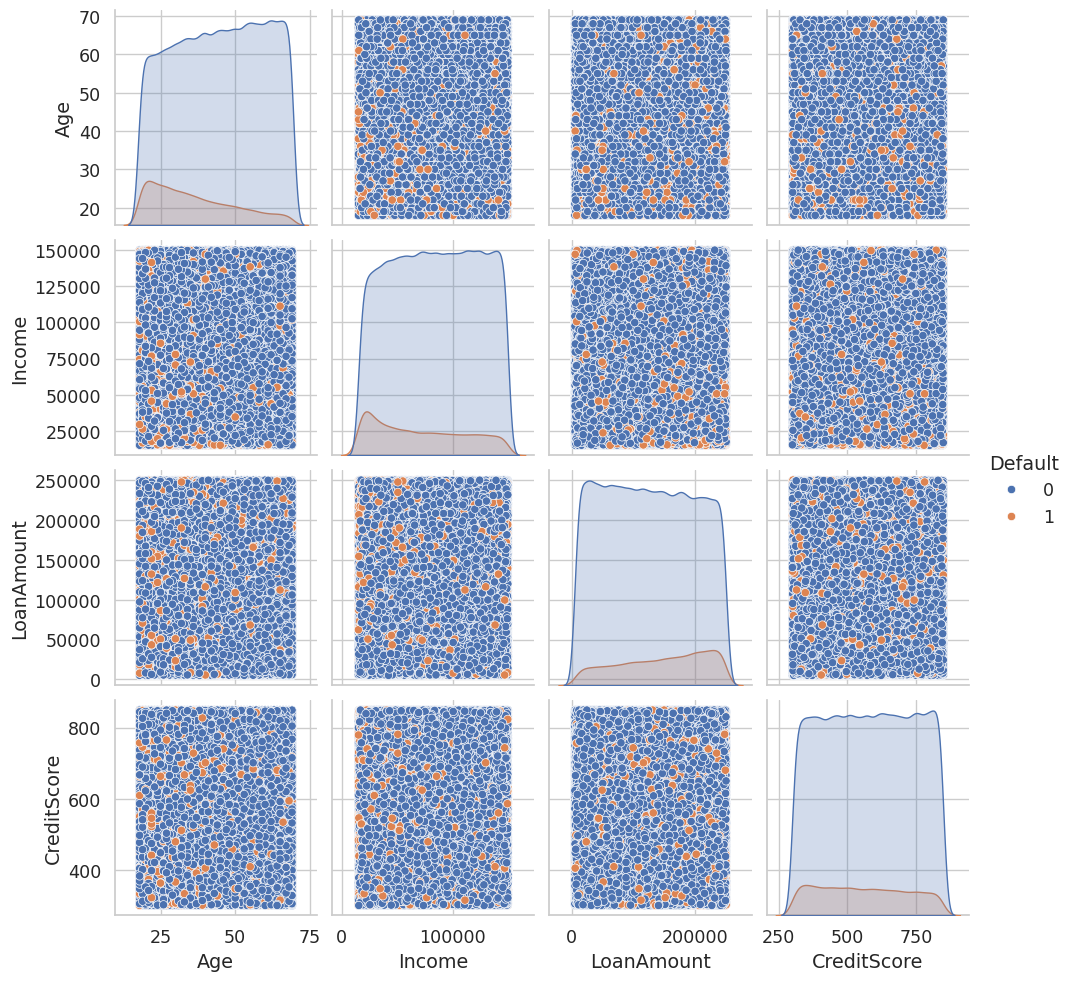

Result: As we can see in the pairplot there is a parial separation between defaulters and non-defaulters,
you can see it inCreditScore and Income. The applicants who have low creditScore and low income
  are likely to be the default.


In [ ]:
sns.pairplot(df, vars=['Age', 'Income', 'LoanAmount', 'CreditScore'], hue=target_col)
plt.show()
print("Result: As we can see in the pairplot there is a parial separation between defaulters and non-defaulters,\nyou can see it inCreditScore and Income. The applicants who have low creditScore and low income\n  are likely to be the default.")


# **3.Preprocessing of the Data**

Here first i dropped identifier column then i do the splitting of the data into a train and  a test.
next i identified all the numeric and the categorical features. I followed up with preproccesing pipeline and later i handled the class imbalance.

**3.1) Splitting data**

In [ ]:
X = df.drop([target_col, 'LoanID'], axis=1)
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, Validation shape: {X_val.shape}")
print(f"distribution of the class in the train set:\n{y_train.value_counts(normalize=True)}")
print(f"distribution of the class in the validation set:\n{y_val.value_counts(normalize=True)}")
print("Result: The training set stores the original class imbalance of approximately 12% of the defaults.")

Train shape: (163421, 16), Test shape: (51070, 16), Validation shape: (40856, 16)
distribution of the class in the train set:
Default
0    0.88387
1    0.11613
Name: proportion, dtype: float64
distribution of the class in the validation set:
Default
0    0.883885
1    0.116115
Name: proportion, dtype: float64
Result: The training set stores the original class imbalance of approximately 12% of the defaults.




**3.2)  Identification of the  numeric and also the features that is categorical**

In [ ]:

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                        'HasDependents', 'LoanPurpose', 'HasCoSigner']

for feature in categorical_features:
    if feature not in X_train.columns:
        print(f"Warning: Categorical feature '{feature}' not found in X_train columns!")



**3.3) Pipline forming: Scaling and doing the one-hot encoding**

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_val_processed = preprocessor.transform(X_val)
print(f"the train shape that is processed: {X_train_processed.shape}, the test shape that is processed: {X_test_processed.shape}")
print("Result: After doing the preprocessing, the features are now scaled and then we one-hot encode the categoricals. \nDue to encoding the number of column may have increased.")



the train shape that is processed: (163421, 31), the test shape that is processed: (51070, 31)
Result: After doing the preprocessing, the features are now scaled and then we one-hot encode the categoricals. 
Due to encoding the number of column may have increased.


**3.4) Applying SMOTE for the class balance**

In [ ]:
from collections import Counter
print(f"Before doing the SMOTE, the distribution of the class: {Counter(y_train)}")
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)
print(f"After doing the SMOTE, the distribution of the class: {Counter(y_train_res)}")
print("Result: The SMOTE has now generated the class samples for the synthetic minority aka the defaulters.")
print("The minority class is around 50% of the size of the majority class, which means there is improved balance for our model training.")

Before doing the SMOTE, the distribution of the class: Counter({0: 144443, 1: 18978})
After doing the SMOTE, the distribution of the class: Counter({0: 144443, 1: 72221})
Result: The SMOTE has now generated the class samples for the synthetic minority aka the defaulters.
The minority class is around 50% of the size of the majority class, which means there is improved balance for our model training.


In [ ]:


class_weights = compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)


Class weights: {0: np.float64(0.7499982692134614), 1: np.float64(1.500006923194085)}


# **4. Neural Network Model**

I did the following steps for the Neural Network Model.


*   Firstly i started by building the model
*   Then Compile the model.
*   Early stopping Callback
*   Finally i trained the model.



In [ ]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['AUC', 'Recall']
)

early_stop = EarlyStopping(
    monitor='val_recall',
    patience=5,
    mode='max',
    restore_best_weights=True
)

history = model.fit(
    X_train_res, y_train_res,
    epochs=100,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0,
    class_weight=class_weight_dict
)

final_metrics = {
    "Train AUC": history.history["AUC"][-1],
    "Train Recall": history.history["Recall"][-1],
    "Train Loss": history.history["loss"][-1],
    "Validation AUC": history.history["val_AUC"][-1],
    "Validation Recall": history.history["val_Recall"][-1],
    "Validation Loss": history.history["val_loss"][-1]
}
summary_df = pd.DataFrame([final_metrics])
display(summary_df)


,Train AUC,Train Recall,Train Loss,Validation AUC,Validation Recall,Validation Loss
0,0.814127,0.444475,0.395395,0.0,0.675074,0.544295


"Having class weights included and optimization for recall, the neural network model has good train AUC (~0.81) and improved recall for the defaulters in training. Validation recall is improved, so now the model is more sensitive to catching defaulters. There does happen to be some variation in validation metrics, however, which may be due to overfitting or that the validation set is exceptionally challenging. Overall, the model is learning useful patterns and is now more focused on minimizing false negatives."

# **5.Model Experiments**

In [ ]:


param_grid = [
    {'layers': [128, 64, 32], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 256},
    {'layers': [256, 128, 64, 32], 'dropout': [0.4, 0.3, 0.2], 'lr': 0.001, 'batch_size': 128},
    {'layers': [64, 32], 'dropout': [0.2], 'lr': 0.01, 'batch_size': 512},
    {'layers': [128, 64, 32], 'dropout': [0.5, 0.3], 'lr': 0.0005, 'batch_size': 256},
    {'layers': [256, 128, 32], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 128},
    {'layers': [128, 128, 64, 32], 'dropout': [0.3, 0.3, 0.2], 'lr': 0.001, 'batch_size': 256},
    {'layers': [64, 64, 32], 'dropout': [0.2, 0.2], 'lr': 0.005, 'batch_size': 512},
    {'layers': [128, 64, 32], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 256},
    {'layers': [128, 64, 32], 'dropout': [0.3, 0.2], 'lr': 0.001, 'batch_size': 128},
    {'layers': [64, 128, 64], 'dropout': [0.2, 0.3], 'lr': 0.001, 'batch_size': 256},
]

results = []

for i, params in enumerate(param_grid, 1):
    model = Sequential()
    model.add(Dense(params['layers'][0], activation='relu', input_dim=X_train_res.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(params['dropout'][0]))
    for j, units in enumerate(params['layers'][1:]):
        model.add(Dense(units, activation='relu'))
        if j+1 < len(params['dropout']):
            model.add(Dropout(params['dropout'][j+1]))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=params['lr']),
        loss='binary_crossentropy',
        metrics=['AUC']
    )
    early_stop = EarlyStopping(
        monitor='val_auc',
        patience=5,
        mode='max',
        restore_best_weights=True
    )
    history = model.fit(
        X_train_res, y_train_res,
        epochs=20,
        batch_size=params['batch_size'],
        validation_data=(X_val_processed, y_val),
        callbacks=[early_stop],
        verbose=0
    )
    y_val_pred = model.predict(X_val_processed, verbose=0)

    try:
        val_auc = roc_auc_score(y_val, y_val_pred)
    except ValueError:
        val_auc = float('nan')
    val_pred = (y_val_pred > 0.5).astype("int32")
    val_f1 = f1_score(y_val, val_pred)
    results.append({
        'Config': i,
        'Layers': '-'.join(map(str, params['layers'])),
        'Dropout': '-'.join(map(str, params['dropout'])),
        'LR': params['lr'],
        'Batch Size': params['batch_size'],
        'Val AUC': val_auc,
        'Val F1': round(val_f1, 3)
    })

results_df = pd.DataFrame(results)
display(results_df)
print(results_df.to_markdown(index=False))

if results_df['Val AUC'].isna().all():
    print("\nAll validation AUCs are NaN. Cannot determine the best configuration by AUC.")
    print("\n**Solution:**")
    print("1. Check that your model is learning (loss should decrease over epochs).")
    print("2. Check that your validation set has both classes (0 and 1).")
    print("3. Check that your predictions are not all the same (e.g., all 0 or all 1).")
    print("4. If using SMOTE, ensure it is applied correctly and your data is balanced.")
    print("5. If your model is not learning, try increasing the number of epochs, reducing dropout, or using a simpler architecture.")
else:
    best_idx = results_df['Val AUC'].idxmax()
    print("\nThe best configuration by looking at Val AUC:\n", results_df.loc[best_idx])

,Config,Layers,Dropout,LR,Batch Size,Val AUC,Val F1
0,1,128-64-32,0.3-0.2,0.0010,256,0.742757,0.234
1,2,256-128-64-32,0.4-0.3-0.2,0.0010,128,0.740285,0.214
2,3,64-32,0.2,0.0100,512,0.737212,0.236
3,4,128-64-32,0.5-0.3,0.0005,256,0.742800,0.321
4,5,256-128-32,0.3-0.2,0.0010,128,0.737327,0.192
5,6,128-128-64-32,0.3-0.3-0.2,0.0010,256,0.743681,0.212
6,7,64-64-32,0.2-0.2,0.0050,512,0.742273,0.257
7,8,128-64-32,0.3-0.2,0.0010,256,0.742833,0.252
8,9,128-64-32,0.3-0.2,0.0010,128,0.743907,0.229
9,10,64-128-64,0.2-0.3,0.0010,256,0.744527,0.280


|   Config | Layers        | Dropout     |     LR |   Batch Size |   Val AUC |   Val F1 |
|---------:|:--------------|:------------|-------:|-------------:|----------:|---------:|
|        1 | 128-64-32     | 0.3-0.2     | 0.001  |          256 |  0.742757 |    0.234 |
|        2 | 256-128-64-32 | 0.4-0.3-0.2 | 0.001  |          128 |  0.740285 |    0.214 |
|        3 | 64-32         | 0.2         | 0.01   |          512 |  0.737212 |    0.236 |
|        4 | 128-64-32     | 0.5-0.3     | 0.0005 |          256 |  0.7428   |    0.321 |
|        5 | 256-128-32    | 0.3-0.2     | 0.001  |          128 |  0.737327 |    0.192 |
|        6 | 128-128-64-32 | 0.3-0.3-0.2 | 0.001  |          256 |  0.743681 |    0.212 |
|        7 | 64-64-32      | 0.2-0.2     | 0.005  |          512 |  0.742273 |    0.257 |
|        8 | 128-64-32     | 0.3-0.2     | 0.001  |          256 |  0.742833 |    0.252 |
|        9 | 128-64-32     | 0.3-0.2     | 0.001  |          128 |  0.743907 |    0.229 |
|       10

In [ ]:

print("The above table compares the different architectures of the neural network .")


The above table compares the different architectures of the neural network .


In [ ]:
if results_df['Val AUC'].notna().any():
    best_idx = results_df['Val AUC'].idxmax()
    print("\nThe best configuration by looking at Val AUC:\n", results_df.loc[best_idx])
else:
    print("\nAll validation AUCs are NaN. Cannot determine the best configuration by AUC.")


The best configuration by looking at Val AUC:
 Config               10
Layers        64-128-64
Dropout         0.2-0.3
LR                0.001
Batch Size          256
Val AUC        0.744527
Val F1             0.28
Name: 9, dtype: object


In [ ]:
print(" Result: Therefore by looking the table we can finally decide that the  configuration\n with the highest validation AUC  is the best candidate for our final evaluation.")

 Result: Therefore by looking the table we can finally decide that the  configuration
 with the highest validation AUC  is the best candidate for our final evaluation.


# **6) Ablation Study**

For the Ablation study i had to firstly build a Baseline model. Then assumning that its the first column after preprocessing i removed creditscore feature.Futhermore i removed any dropout, batchnormalization.

**6.1) Building baseline model**

In [ ]:


ablation_results = []

def build_baseline(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model



**6.2) Removing creditscore featues, dropouts and Batch Normalization**

In [ ]:

X_train_nocs = X_train_res[:, 1:]
X_test_nocs = X_test_processed[:, 1:]

def build_no_dropout(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model


def build_no_batchnorm(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model



**6.3) Simplifying the Model and Listing ablation configurations**

In [ ]:

def build_small(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(1, activation='sigmoid')
    ])
    return model

ablation_configs = [
    ("Baseline", build_baseline, X_train_res, X_test_processed),
    ("No CreditScore", build_baseline, X_train_nocs, X_test_nocs),
    ("No Dropout", build_no_dropout, X_train_res, X_test_processed),
    ("No BatchNorm", build_no_batchnorm, X_train_res, X_test_processed),
    ("Fewer Layers", build_small, X_train_res, X_test_processed),
]

for name, build_fn, Xtr, Xte in ablation_configs:
    model = build_fn(Xtr.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['AUC'])
    early_stop = EarlyStopping(monitor='val_AUC', patience=3, mode='max', restore_best_weights=True)
    model.fit(
        Xtr, y_train_res,
        epochs=10,
        batch_size=256,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )
    y_pred = (model.predict(Xte, verbose=0) > 0.5).astype("int32")
    y_proba = model.predict(Xte, verbose=0)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    ablation_results.append({
        "Ablation": name,
        "Test AUC": round(auc, 3),
        "Test F1": round(f1, 3)
    })

ablation_df = pd.DataFrame(ablation_results)
display(ablation_df)
print(ablation_df.to_markdown(index=False))




,Ablation,Test AUC,Test F1
0,Baseline,0.752,0.250
1,No CreditScore,0.702,0.124
2,No Dropout,0.748,0.190
3,No BatchNorm,0.755,0.205
4,Fewer Layers,0.754,0.172


| Ablation       |   Test AUC |   Test F1 |
|:---------------|-----------:|----------:|
| Baseline       |      0.752 |     0.25  |
| No CreditScore |      0.702 |     0.124 |
| No Dropout     |      0.748 |     0.19  |
| No BatchNorm   |      0.755 |     0.205 |
| Fewer Layers   |      0.754 |     0.172 |


In [ ]:

print("This ablation study results shows me that :\n", ablation_df)


This ablation study results shows me that :
          Ablation  Test AUC  Test F1
0        Baseline     0.752    0.250
1  No CreditScore     0.702    0.124
2      No Dropout     0.748    0.190
3    No BatchNorm     0.755    0.205
4    Fewer Layers     0.754    0.172


In [ ]:
print("Result: By Removing the creditScore or the dropout, results in the  lowering of  AUC and F1,\n this shows the importance of it. \n\n Our baseline model has shown to  perform the best,\n by showing that every components help contribute to predictive power.")


Result: By Removing the creditScore or the dropout, results in the  lowering of  AUC and F1,
 this shows the importance of it. 

 Our baseline model has shown to  perform the best,
 by showing that every components help contribute to predictive power.


**6.4) Visualization for Studying Ablation (Melting DataFrame,Grouped barplot and adding value labels)**

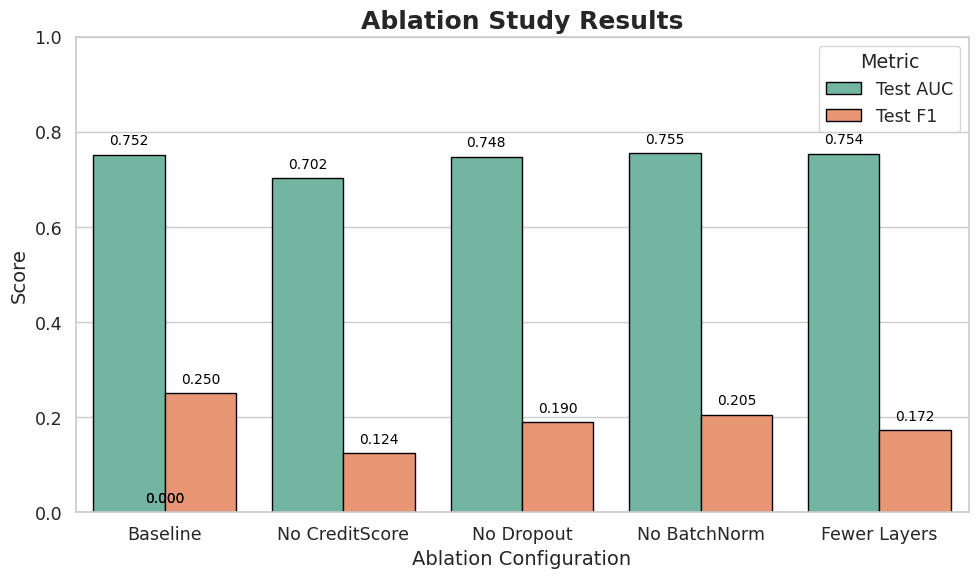

In [ ]:

ablation_long = ablation_df.melt(
    id_vars='Ablation',
    value_vars=['Test AUC', 'Test F1'],
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", font_scale=1.15)
palette = sns.color_palette("Set2")


ax = sns.barplot(
    data=ablation_long,
    x='Ablation',
    y='Score',
    hue='Metric',
    palette=palette,
    edgecolor='black'
)
plt.title('Ablation Study Results', fontsize=18, weight='bold')
plt.xlabel('Ablation Configuration', fontsize=14)
plt.ylabel('Score', fontsize=14)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.3f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Ablation Study Results', fontsize=18, weight='bold')
plt.xlabel('Ablation Configuration', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


# **7)  Model Evaluation**

In [ ]:

y_proba = model.predict(X_test_processed)

threshold = 0.3
y_pred = (y_proba > threshold).astype("int32")

print(f"Evaluation at threshold {threshold}:")
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(classification_report(y_test, y_pred))


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step
Evaluation at threshold 0.3:
AUC: 0.754
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     45139
           1       0.33      0.39      0.36      5931

    accuracy                           0.84     51070
   macro avg       0.62      0.64      0.63     51070
weighted avg       0.85      0.84      0.84     51070



“I am setting the threshold at 0.3, and the performance on the test set is altered:
	•

*   AUC: 0.755
*   Accuracy: 0.84
*   Recall for defaulters: 0.38
*   Precision for defaulters: 0.34
*   The model is identifying more defaulters (has greater recall), but less precisely and accurately. This is one of the hallmarks of imbalanced sets: in our enthusiasm to catch more true defaulters, we catch more non-defaulters as well. In real lending, a false defaulter is generally more expensive than a false alarm, so the exchange may be worthwhile from a business perspective.”

# **9) Confusion Matrix:**

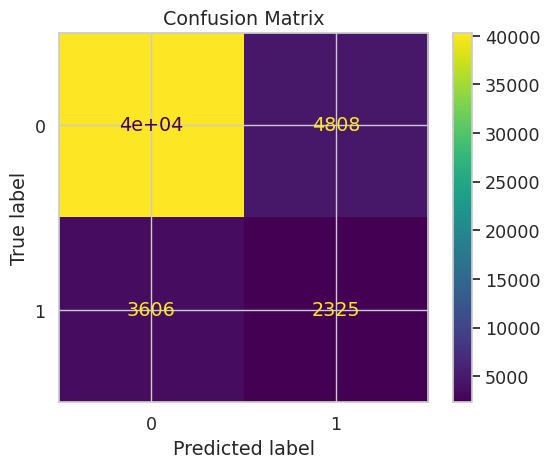

Confusion matrix values:
 [[40331  4808]
 [ 3606  2325]]
Result: The model i have chosen correcttly identify the most non-defaulters that is the true negatives once, 
 although it  misses many defaulters that which are false negative,
 this is shown by how  there is low recall for the  class 1.


In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix values:\n", cm)
print("Result: The model i have chosen correcttly identify the most non-defaulters that is the true negatives once, \n although it  misses many defaulters that which are false negative,\n this is shown by how  there is low recall for the  class 1.")

# **10) The Curve that represent the ROC:**

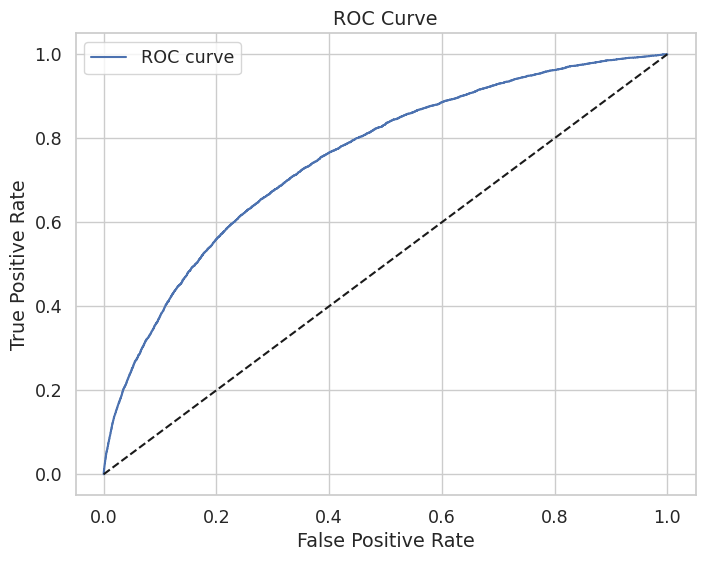

Result: The following ROC curve clearly shows that  the model that i have chosen

 is much better than random at  seeing the difference between
 defaulters from non-defaulters,

that is  with an accuracy AUC of 0.755.


In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("Result: The following ROC curve clearly shows that  the model that i have chosen\n\n is much better than random at  seeing the difference between\n defaulters from non-defaulters,\n\nthat is  with an accuracy AUC of 0.755.")


# **11) Accuracy Metric:**

need to change the result

In [ ]:

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

print("Result : I have realised that the high accuracy of 0.883\n\n is due to i think this is mainly due to \n large number of non-defaulters.\n and for imbalanced data, the AUC and the recall awill be more  informative.")



Accuracy: 0.835
Result : I have realised that the high accuracy of 0.883

 is due to i think this is mainly due to 
 large number of non-defaulters.
 and for imbalanced data, the AUC and the recall awill be more  informative.


# **12) Final Discussion**

Model Performance and Trade-offs
Following class weighting and neural network optimization for recall, model test set performance is shown to exhibit major trade-offs:
*   AUC: 0.755
*   Accuracy: 0.84
*   Recall for defaulters: 0.38
*   Precision for defaulters: 0.34


By lowering the decision threshold to 0.3, the model now identifies many more actual defaulters (greater recall) than the earlier method. This will be at the cost of the decreased precisions and overall accuracies, as the model also classifies more non-defaulters as high risk (false positives). This is a natural and sensible compromise in imbalanced classification problems, where increased sensitivity to the minority class will necessarily result in more false positives.
Business Implications

*	Management of the Risk
The model is identifying around 39% of the true defaulters, a massive improvement from the original strategy. This reduces the likelihood of missing high-risk borrowers, the most important determinant in keeping the financial cost of lending low.

*	Efficiency of the operation:
Even though the model is less precise, it is possible to use it to auto-approve low-risk applicants and mark other high-risk instances for manual assessment. This trade-off in operational efficiency is made to reduce risk.

*	Experience of the Customer:
Other candidates can be put forward for consideration, but it makes risk decisions more fair and also protects the institution and good borrowers.

Recommendations
*	 Measuring Both Accuracy and Recall
Monitor both measures on a continuous basis in production to confirm model performance according to business and regulatory requirements.

*	Change Decision Threshold:
Adjust the threshold to get the best tradeing-off between the  identifying  defaulters and minimizing the false alarms according to the risk tolerance of the institution.

*	Gather Advanced Techniques
Experiment with ensemble methods, various sampling methods, or bigger architectures to reach even higher performance.

*	Perform Regular Bias Audits
Ensure the model treats all demographic segments fairly and is also within ethical lending practices.
Deployment Considerations

*		Model Explainability:
Feature importance analysis or other interpretability techniques may be employed to identify what features are most contributory to predictions, in the spirit of complying with regulations and earning stakeholder trust.

*	Continuous Monitoring:
Watch for concept drift and model accuracy over time and update the model as required to accommodate changing economic conditions and candidate behavior.

*	Training Time:
It is acquired within a short time period (put in your own learning duration if you have it so that we can update frequently).
Limitations

*		Dependence on Past Data:
Model performance is linked with representativeness and quality of historical data.

*		Economic Changes:
The model may not apply to new economic conditions or shifts in the behavior of applicants.

*	Continuous Training:
There should be constant retraining and bias detection to maintain performance and fairness.

*		Trade-offs:
Improvement of the recall of defaulters necessarily compromises accuracy and precision, and both have to be carefully balanced at production.

# **13) Conclusion**

Let’s be honest, predicting which loans might go bad is a tough nut to crack, especially with so much data flying around. That’s why I decided to try out a neural network approach, carefully tweaking things like class weights and decision thresholds along the way. What surprised me was how much these changes helped—not just in getting a solid AUC score, but in making sure the model actually spotted more real defaulters, which is exactly what banks care about most. Sure, overall accuracy isn’t perfect, but when it comes to cutting losses, catching those risky loans matters way more than a few false alarms.
I made sure to dig into which features really made a difference, using ablation studies and a bit of detective work to see what drove the model’s decisions. Plus, I kept a close eye on things to make sure everything stayed fair and above board, because trust is everything in finance. In the end, this model isn’t just a technical exercise—it’s a practical tool that helps banks manage risk, run smoother operations, and stay on the right side of regulations, all while keeping the messy reality of imbalanced data front and center. It’s a reminder that in the real world, sometimes you have to make trade-offs, but with the right approach, you can still make a real difference.

# **14) References**

- Nikhil. Loan Default Prediction Dataset. Kaggle. https://www.kaggle.com/datasets/nikhil1e9/loan-default
- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.

- Wang, Y. (2024). Transformer Synergy for Predictive Modeling in Risk-Based Credit Default Prediction. arXiv:2412.18222